In [1]:
# -------------------------------------------------
# Modul 01 - Eksplorasi ANN untuk Klasifikasi Biner
# -------------------------------------------------
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_circles, make_classification
from torchmetrics.classification import BinaryAccuracy


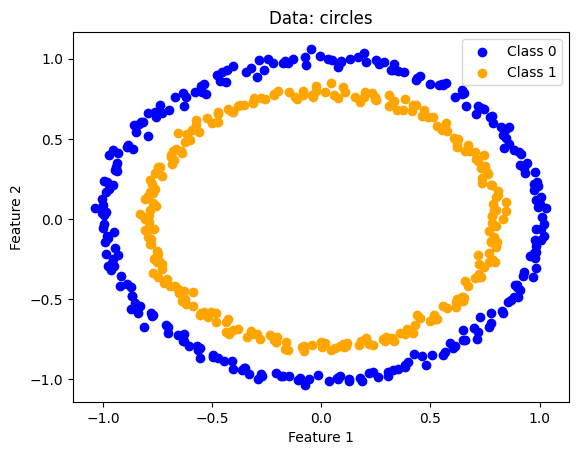

In [2]:
# -------------------------------------------------
# 1. Pilih Dataset
# -------------------------------------------------
torch.manual_seed(42)
np.random.seed(42)

dataset_choice = "circles"  

num_data = 500
if dataset_choice == "circles":
    X, y = make_circles(n_samples=num_data, noise=0.02, random_state=42)
elif dataset_choice == "classification":
    X, y = make_classification(
        n_samples=num_data,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        random_state=42
    )
else:
    raise ValueError("Pilihan dataset tidak valid!")

plt.scatter(X[y == 0, 0], X[y == 0, 1], color="blue", label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="orange", label="Class 1")
plt.title(f"Data: {dataset_choice}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [3]:
# -------------------------------------------------
# 2. Split data train/test & DataLoader
# -------------------------------------------------
train_size = 400
test_size = num_data - train_size
batch_size = 50

x_train_pt = torch.tensor(X[:train_size], dtype=torch.float32)
y_train_pt = torch.tensor(y[:train_size], dtype=torch.float32).unsqueeze(1)

x_test_pt = torch.tensor(X[train_size:], dtype=torch.float32)
y_test_pt = torch.tensor(y[train_size:], dtype=torch.float32).unsqueeze(1)

train_set = TensorDataset(x_train_pt, y_train_pt)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)


In [4]:
# -------------------------------------------------
# 3. Definisi model ANN (Eksplorasi)
# -------------------------------------------------
class SimpleANN(torch.nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(SimpleANN, self).__init__()
        self.fc1 = torch.nn.Linear(input_size, hidden_size1)
        self.fc2 = torch.nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = torch.nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = torch.nn.Linear(hidden_size3, output_size)

        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
        self.leakyrelu = torch.nn.LeakyReLU(0.1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.leakyrelu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x


In [5]:
# -------------------------------------------------
# 4. Fungsi Training
# -------------------------------------------------
def train_model(model, dataloader, criterion, optimizer, epochs=50):
    model.train()
    loss_history = []
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_loss = running_loss / len(dataloader)
        loss_history.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
    return loss_history


---
Bagian ini adalah tahap pelatihan model. Pertama, dibuat objek model_ann dari kelas SimpleANN dengan 2 input, 3 hidden layer (16, 12, 8 neuron), dan 1 output. Fungsi loss yang dipakai adalah BCELoss karena kasusnya klasifikasi biner. Optimizer yang digunakan adalah Adam dengan learning rate 0.01 untuk memperbarui bobot model. Proses training dijalankan lewat fungsi train_model selama 100 epoch, dan nilai loss tiap epoch disimpan di loss_history. Terakhir, loss divisualisasikan dengan plot agar terlihat bagaimana model belajar dan apakah error makin menurun seiring bertambahnya epoch.

---

Epoch 1/100, Loss: 0.6963
Epoch 2/100, Loss: 0.6871
Epoch 3/100, Loss: 0.6850
Epoch 4/100, Loss: 0.6750
Epoch 5/100, Loss: 0.6591
Epoch 6/100, Loss: 0.6251
Epoch 7/100, Loss: 0.5786
Epoch 8/100, Loss: 0.5017
Epoch 9/100, Loss: 0.3918
Epoch 10/100, Loss: 0.2820
Epoch 11/100, Loss: 0.1807
Epoch 12/100, Loss: 0.1057
Epoch 13/100, Loss: 0.0752
Epoch 14/100, Loss: 0.0424
Epoch 15/100, Loss: 0.0372
Epoch 16/100, Loss: 0.0234
Epoch 17/100, Loss: 0.0171
Epoch 18/100, Loss: 0.0134
Epoch 19/100, Loss: 0.0111
Epoch 20/100, Loss: 0.0080
Epoch 21/100, Loss: 0.0073
Epoch 22/100, Loss: 0.0067
Epoch 23/100, Loss: 0.0050
Epoch 24/100, Loss: 0.0048
Epoch 25/100, Loss: 0.0044
Epoch 26/100, Loss: 0.0039
Epoch 27/100, Loss: 0.0034
Epoch 28/100, Loss: 0.0032
Epoch 29/100, Loss: 0.0030
Epoch 30/100, Loss: 0.0027
Epoch 31/100, Loss: 0.0026
Epoch 32/100, Loss: 0.0024
Epoch 33/100, Loss: 0.0022
Epoch 34/100, Loss: 0.0021
Epoch 35/100, Loss: 0.0020
Epoch 36/100, Loss: 0.0019
Epoch 37/100, Loss: 0.0020
Epoch 38/1

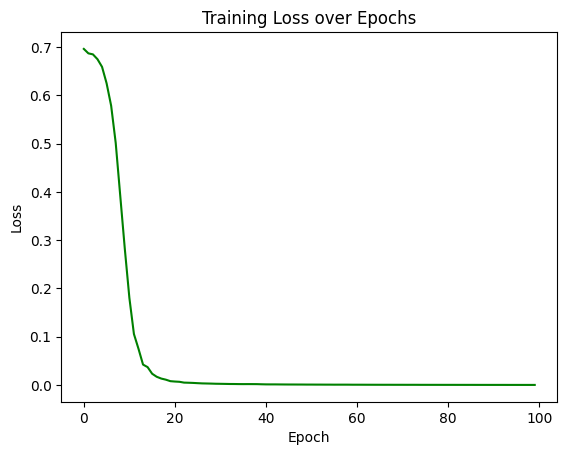

In [6]:
# -------------------------------------------------
# 5. Training Model
# -------------------------------------------------
model_ann = SimpleANN(input_size=2, hidden_size1=16, hidden_size2=12, hidden_size3=8, output_size=1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model_ann.parameters(), lr=0.01)

loss_history = train_model(model_ann, train_loader, criterion, optimizer, epochs=100)

plt.plot(loss_history, color="green")
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


---

Dari hasil training tersebut terlihat bahwa loss turun secara konsisten dari sekitar 0.69 (awalnya mendekati tebakan acak untuk klasifikasi biner) hingga sangat kecil di akhir (~0.0003).
Model berhasil belajar dengan baik memisahkan dua kelas.
Penurunan loss cepat (mulai tajam di epoch 6–12) menunjukkan optimizer Adam + arsitektur ANN cukup efektif.
Loss yang sangat rendah mendekati nol mengindikasikan model mungkin hampir menghafal data train, yang bisa menyebabkan overfitting jika diuji pada data baru.

Walaupun training loss bagus, kita perlu lihat akurasi di test set atau lakukan regularisasi (dropout, early stopping, atau kurangi kompleksitas model) untuk memastikan model tidak terlalu overfit.

---

In [7]:
# -------------------------------------------------
# 6. Evaluasi Model
# -------------------------------------------------
model_ann.eval()
with torch.no_grad():
    y_pred = model_ann(x_test_pt)

metric = BinaryAccuracy(threshold=0.5)
accuracy = metric(y_pred, y_test_pt)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 1.0000


---

Output Test Accuracy: 1.0 artinya model mampu mengklasifikasikan seluruh data test set dengan benar tanpa ada kesalahan. Ini menunjukkan model sangat baik dalam mempelajari pola data pada dataset yang digunakan.
Beberapan alasan mengapa model bisa dikatakan sempurna kareena :
1. Dataset sederhana → Data make_circles atau make_classification dengan 2 fitur relatif mudah dipisahkan, sehingga ANN dengan arsitektur yang cukup kompleks bisa dengan cepat mencapai akurasi sempurna.
2. Overfitting mungkin terjadi → Walaupun test set kecil (100 data) juga ikut terklasifikasi sempurna, hasil ini tidak menjamin model akan bekerja sama baiknya pada data baru yang lebih bervariasi.
3. Arsitektur cukup kuat → Dengan 3 hidden layer (16–12–8 neuron) dan aktivasi beragam, model punya kapasitas tinggi untuk belajar bahkan pola non-linear yang sederhana sekalipun.
Singkatnya, akurasi 1.0 menunjukkan model terlalu cocok dengan dataset yang sederhana ini, sehingga perlu diuji dengan dataset lebih kompleks atau ditambahkan regularisasi agar terlihat performa realistisnya. 

---


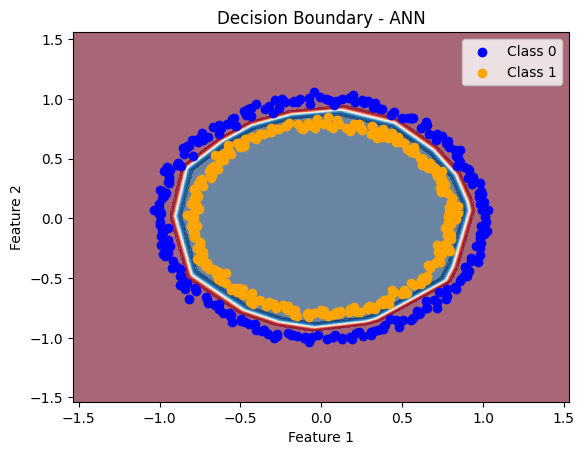

In [8]:
# -------------------------------------------------
# 7. Visualisasi Decision Boundary
# -------------------------------------------------
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid_points, dtype=torch.float32)
with torch.no_grad():
    Z = model_ann(grid_tensor)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z.numpy(), levels=50, cmap="RdBu", alpha=0.6)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="blue", label="Class 0")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="orange", label="Class 1")
plt.title("Decision Boundary - ANN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Dari kesimpulan yang didapat, model ini terlalu sempurna. Sehingga agar tidak overfitting kita dapat mengubah beberapan komponen :
1. Arsitektur model → kurangi hidden layer/neuron, pakai aktivasi sederhana.

2. Regularisasi → tambahkan Dropout, gunakan weight decay (L2).

3. Data → bagi data agar lebih seimbang, tambahkan noise atau variasi data.

4. Training → kurangi epoch, atau pakai early stopping.

Di bawah ini adalah sedikit perubahan agar model tidak overfitting : 